# Kansverdelingen


In dit notebook vind je de opdrachten over kansverdeling.
- <a href="#kv_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding op het college.
- <a href="#kv_opdracht2"> Opdracht 2 </a> maken we in het college.

<a id="kv_opdracht1"></a>
## Opdracht 1

In [1]:
import numpy as np
import scipy.stats as stats

## Voorbeeld - bananen 
Gegeven is een kansverdeling voor het gewicht van bananen met de volgende eigenschappen:
- µ = ‘mu’ = gemiddelde = 50 gr
- σ = ‘sigma’ = standaard deviatie = 7,5 gram

Voor normaalverdeling gelden de volgende regels:

Bij 90% hoort -/+ 1,64 σ

Bij 95% hoort -/+ 1,96 σ

Bij 99% hoort -/+ 2,58 σ

Bepaal met de hand: 
- 90% weegt tussen de …… en …... gram
- 99% weegt tussen de …… en …… gram 
- 5% weegt meer dan …… gram
- 5% weegt minder dan …… gram
- 95% weegt minder dan …… gram

In [15]:
mu, sigma = 50, 7.5
nv = stats.norm(loc=mu,scale=sigma)
print(nv.ppf(0.05))

37.66359779786396


Hieronder zie je een voorbeeld van hoe je kansen kunt berekenen met behulp van scipy

In [2]:
# Berekening van waarde naar kans met scipy
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)
print(nv.cdf(mu - 1.96*sigma))   # 35,3 gram
print(nv.cdf(mu + 1.96*sigma))   # 64,7 gram
print(nv.cdf(mu + 1.96*sigma) - nv.cdf(mu - 1.96*sigma)) # tussen 35,3 en 64,7 gram

0.024997895148220397
0.9750021048517796
0.9500042097035593


Kansverdeling bananen, met µ = 50 gram en σ = 7,5 gram

Bereken met de functies van `scipy.stats`:

- 5% weegt minder dan ... gram
- de middelste 90% weegt tussen de ... en ... gram
- het derde kwart weegt tussen de ... en ... gram
- ...% weegt meer dan 40 gram
- ...% weegt tussen de 61 en 73 gram

<a id = "kv_opdracht2"></a>
## Opdracht 2 - toetsuitslagen


In deze opdracht gaan we de toetsuitslagen analyseren van het eerstejaarsvak Programming (PROG).

De tentamenuitslagen zijn beschikbaar gesteld in een Excelbestand: uitslag_prog.xlsx

### Deel 1. Libraries importeren

We zullen voor de analyses gebruik maken van `pandas` en `matplotlib`. Importeer hiervoor de juiste biblioteheken.
Matplotlib is standaard geinstalleerd als je Anaconda gebruikt. In de overige gevallen kun je Matplotlib als volgt installeren:

1. Open een terminal: Win+R -> cmd -> enter: pip install matplotlib
2. Installeer via de anaconda package manager: conda install matplotlib

Je kunt natuurlijk ook in Google Colab werken: dan hoef je niks te installeren

In [3]:
# Bibliotheken
from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

### Deel 2. Analyse dataset
In dit deel gaan we de data ophalen, een aantal zaken aanpassen en de eerste analyses uitvoeren.


- Importeer de dataset in een geschikt dataframe en beschrijf de dataset:
  * Wat zijn de dimensies van het dataframe? Wat betekenen deze getallen? **Tip**: gebruik de shape functie
  * Wat is de betekenis van de attributen in het dataframe? **Tip**: gebruik de head() functie
  * Wat zijn de datatypes voor de attributen (nominaal/categoriaal/discreet/continue)? **Tip**: gebruik de dtypes functie maar denk ook zelf na!

In [4]:
# Importeer datasets
uitslag_prog = pd.read_excel("uitslag_prog.xlsx")

# Merk op: mogelijk krijg je foutmeldingen, lees deze goed want de oplossing is vaak simpel

***Tip 1: schoon niet alleen de inhoud van de data op, maar ook de labels / namen***

De Excel-file bevatte dezelfde header-name voor alle scores. De importer heeft dit voor je opgelost door duplicate header-namen te nummeren. Nadeel is echter dat de eerste zelf geen nummer heeft. Manipuleer de headers zodat de telling begint met Score.1 ipv. Score (merk op dat Score.1 dan hernoemt moet worden naar Score.2, etc.). Toon hierna de eerste 10 regels van het dataframe.




In [5]:
# Code voor het hernoemen
columns=lambda x: x[1:]

replacements = {"Score." + str(i) : "Score." + str(i+1)  for i in range(1, 40)}
replacements["Score"] = "Score.1"

In [6]:
# Hernoemen van de columns van het dataframe
uitslag_prog.rename(columns=replacements, inplace=True)

In [7]:
uitslag_prog.head()

,StudentNummer,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,...,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40
0,8751631,2016-10-13 13:24:46.000,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,4897318,2016-10-13 13:06:16.000,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,7749231,2016-10-13 13:06:39.000,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,2170653,2016-10-13 11:11:01.000,0,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0
4,5540046,2016-10-13 13:22:07.000,1,0,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1


Het datatype van kolom 'eindtijd' zou overduidelijk een tijdstip moeten zijn, maar `dtypes` geeft aan dat het een object is. Converteer deze kolom naar een datetime. **Tip**: gebruik `to_datetime()` van Pandas. Controleer jouw actie met de `info()` functie.

Bepaal een paar statistieken van de dataset met de `describe()` functie. Wat betekenen deze getallen?


StudentNummer wordt behandeld als een continue getal, maar eigenlijk zou het type nominaal moet zijn. Converteer het type van StudentNummer naar Categorial m.b.v. `astype`. Voer nu nogmaals `describe()` uit. Wat is er veranderd?


***Tip 2: visualisaties helpen bij het analyseren van de data***

Plot een histogram voor het attribuut `Eindtijd` (zorg dat de labels op de assen niet overlappen). Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

<AxesSubplot:>

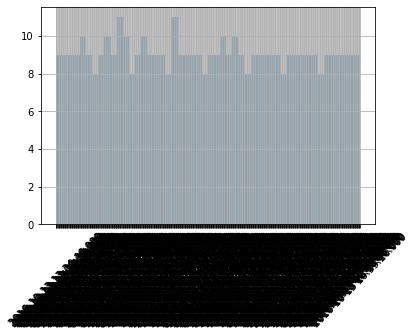

In [8]:
uitslag_prog.Eindtijd.hist(bins=50, xrot=45)

Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

### Deel 3. Analyse attributen met behulp van centrummaten

In dit deel zullen we de vragen van het tentamen analyseren met behulp van de centrummaten

Bereken het gemiddelde van de score van elke vraag en sorteer de waardes van hoog naar laag. **Tip**: ga niet zelf code schrijven om deze berekeningen uit te voeren maar maak gebruik van de standaardfuncties van Pandas! 
  

Plot het gemiddelde per vraag in een barchart en daarna in een linechart. **Tip**: maak gebruik van de `plot()` functie van een Pandas dataframe.

Bereken de mediaan. 
- Wat kun je zeggen over de mean van een vraag als je de mediaan weet? Is de mean bijvoorbeeld altijd hoger of lager dan een bepaalde waarde gegeven de mediaan? 
- Is deze relatie er altijd?   

Bereken de modus. 
- Waarom zie je voor deze centrummaat wél StudentNummer als kolom terug in het resultaat? 
- Waarom zie je meerdere rijen?
- Waarom bevatten sommige cellen NaN?

### Deel 4. Analyse attributen met behulp van spreidingsmaten
We gaan verder met het analyseren van de vragen, maar nu met behulp van enkele spreidingsmaten.

Bereken de variantie van elke vraag. Sorteer deze waardes.
- Wat zegt dit getal?
- Wat voor *kwalitatieve* uitspraak kun je doen over een vraag als de variantie hoog is?

Bereken de standaard deviatie. 
- Hoe verschilt deze maat van de variantie? 
- Is er een verband tussen de standaard deviatie en variantie? Welke van beide maten is intuitiever?

Hieronder wordt de gemiddelde score per vraag geplot (als *bars*) en daarnaast de standaarddeviatie (als lijn).
- Is er op het oog een verband tussen de centrummaat en de spreidingsmaat?

In [9]:
# Visualisatie 1
uitslag_prog.loc[:,'Score.1':'Score.40'].mean().sort_values().plot.bar(yerr=uitslag_prog.std(), width = 0.9, figsize=(14, 6))

TypeError: could not convert string to float: '2016-10-13 13:24:46.000'

In [ ]:
# Visualisatie 2
means = uitslag_prog.loc[:,'Score.1':'Score.40'].mean()
stds = uitslag_prog.loc[:,'Score.1':'Score.40'].std()
means_stds = pd.concat([means, stds], axis=1)

means_stds.sort_values(by=0, inplace=True)

means_stds[0].plot(kind='bar')
means_stds[1].plot(kind='line')

## Deel 5. Analyse van studenten
In deel 3 en 4 hebben we de kolommen (attributen) geanalyseerd, nu gaan we de rijen (de verschillende studenten in de dataset) analyseren.

Bepaal de gemiddelde scores per student en toon de hoogstscorende eerst. 
- **Tip 1**: we hebben de `mean` functie hiervoor gebruikt om het gemiddelde van kolommen te berekenen, nu wil je eigenlijk het gemiddelde van rijen berekenen... zoek naar de inputparameter voor de `mean` functie waarmee je dit makkelijk kunt fixen! 
- **Tip 2**: als je een gemiddelde krijgt groter dan 1, kijk dan goed naar welke kolommen je als input mee geeft

***Tip 3: het kan handig zijn om zelf de dataset uit te breiden met nieuwe informatie***

Onderstaande code berekent het cijfer voor elke student. Hierbij wordt rekening gehouden met de *cesuur* (= gokkans):
  1. cijfer = $\frac{9}{30}(\sum_{i=1}^{40}{Score.i}-10) + 1$
  2. eindcijfer = $\max(1, cijfer)$.

In [ ]:
uitslag_prog['Cijfer'] = (9/30)*(uitslag_prog.sum(1) - 10) + 1
uitslag_prog['Eindcijfer'] = np.maximum( uitslag_prog['Cijfer'], [1]*uitslag_prog.shape[0] )

Bepaal het totale gemiddelde over alle studenten. Doe dit nogmaals, maar dan alleen de studenten die een voldoende hebben gescoord.

Plot een histogram van de eindcijfers met de `plot.hist()` functie van een dataframe. Met Matplotlib kan het *fancier*, maar dat komt later! Wat kun je zeggen over de verdeling (scheef? multimodaal? normaal?) En voor cijfer?

Laten we aannemen dat de cijfers normaal verdeeld zijn. Bepaal de parameters van een normaalverdeling voor de eindcijfers van alle studenten.


Een normaalverdeling wordt beschreven door 2 parameters:  
1. Het gemiddelde $\mu$  
2. De standaarddeviatie $\sigma$

Als we de cijferdistributie willen benaderen met een normaalverdeling, dan geldt:
1. $\mu = $ uitslag_prog.Cijfer.mean()
2. $\sigma = $ uitslag_prog.Cijfer.std()

Sla het gemiddelde op als `mu_cijfers` en de standaarddeviatie als `sigma_cijfers` en run dan onderstaande code de normaalverdeling als formule (`normal_cijfers`) te genereren en om deze normaalverdeling te visualiseren. In de visualisatie worden ook de originele gegevens getoond, je ziet dat er *bijna* sprake is van een normaalverdeling.

In [ ]:
# Geef deze variabelen de correcte waarde
mu_cijfers = 
sigma_cijfers = 

# Pas deze code niet aan
normal_cijfers = sp.stats.norm(mu_cijfers, sigma_cijfers)
x = np.linspace(-5,15,1000)
y = normal_cijfers.pdf(x)

fig, ax1 = plt.subplots()
ax1.plot(x,y)
ax2 = ax1.twinx()
ax2.hist(uitslag_prog.Eindcijfer, bins=15)
plt.show()

Bereken:
 * $\Pr(C < 6)$. **Tip**: gebruik `normal_cijfers` en de functie `cdf()` 
 * $\Pr(C > 8,5)$
 * $\Pr(C > 10)$. Leg uit waarom dit groter dan 0 is.
 * $\Pr(6 < C < 8,5)$.
 * $\Pr(C < 6 \lor C > 8,5) \>$ ($\lor$ is wiskundige notatie voor OR)


Hier visualiseren we het voorlaatste scenario, gewoon omdat het kan:


In [ ]:
plt.plot(x,y)
plt.fill_between(x,y, where=sp.logical_and(x>6, x<8.5))
plt.show()

Welk cijfer moet je minimaal hebben om bij de top 10% van de klas te behoren?
